A payment default occurs when you fail to pay the minimum amount due on the credit card for a few consecutive months.

# Importing libraries

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the dataset

In [24]:
df1 = pd.read_csv(r'C:\Users\Admin\Downloads\UCI_Credit_Card.csv', delimiter=',')
df1.dataframeName = 'UCI_Credit_Card.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


# Exploratory data analysis

In [25]:
defaulters = df1.copy()
print(defaulters.shape)
defaulters.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [26]:
defaulters.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [27]:
defaulters.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [28]:
# checking the datatype of each feature
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [29]:
defaulters.isna().sum()    # check for missing values for surity

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

COUNT PLOT

Checking the count of samples in each class (Default credit card payment or not)

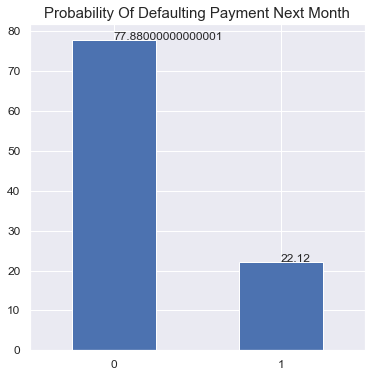

In [30]:
def_cnt = (defaulters.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

There is class imbalance in the dataset

DISTRIBUTION PLOT

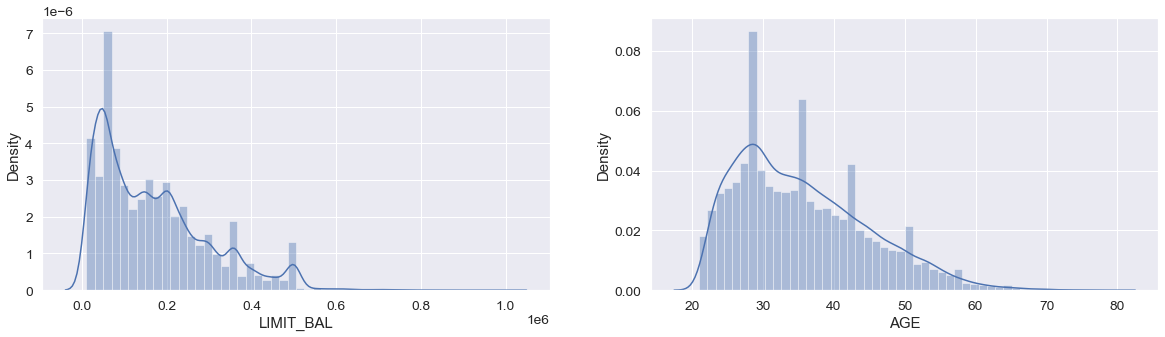

In [31]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(defaulters.LIMIT_BAL)

plt.subplot(122)
sns.distplot(defaulters.AGE)

plt.show()

By plotting the continous variables we observe that dataset consists of skewed data of limiting balance and age of clients. We have more number of clients having limiting balance between 0 to 200000 currency. We have more number of clients from age bracket of 20 to 40

BAR PLOTS

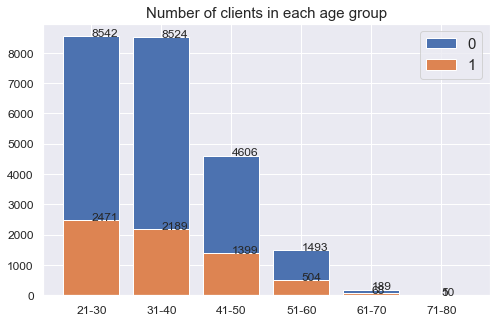

In [32]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()


We have maximum clients from 21-30 age group followed by 31-40. Hence with increasing age group the number of clients that will default the payment next month is decreasing. Hence we can see that Age is important feature to predict the default payment for next month.

FACET PLOT

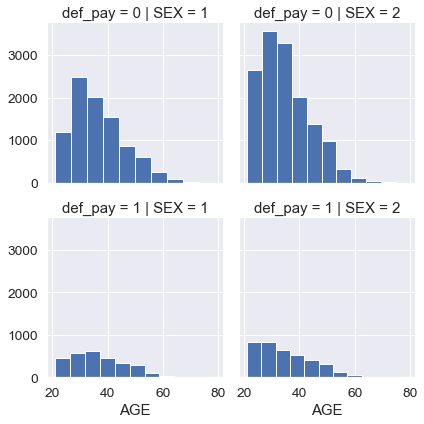

In [33]:
g = sns.FacetGrid(defaulters, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

It can be seen that females of age group 20-30 have very high tendency to default payment compared to males in all age brackets. Hence we can keep the SEX column of clients to predict probability of defaulting payment.

SCATTER AND SUB PLOTS

check if the past six months bill amount will affect the payment default next month or not:

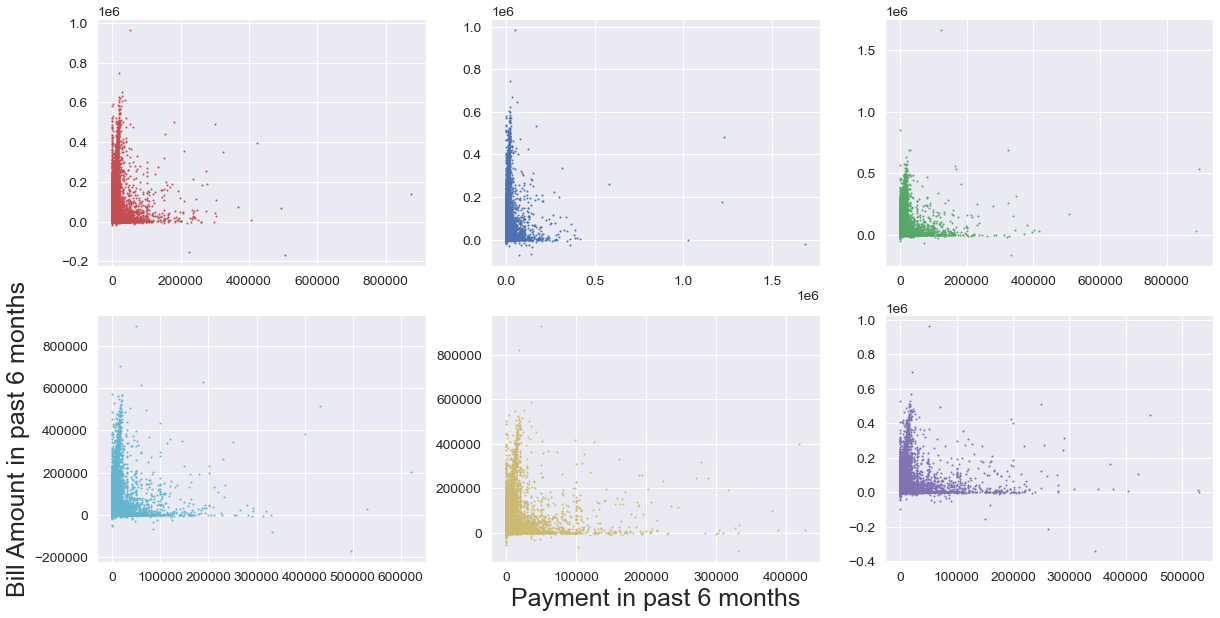

In [34]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)

plt.show()

Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. This we can infer since maximum number of datapoints are closely packed along the Y-axis near to 0 on X-axis.

HEAT MAP

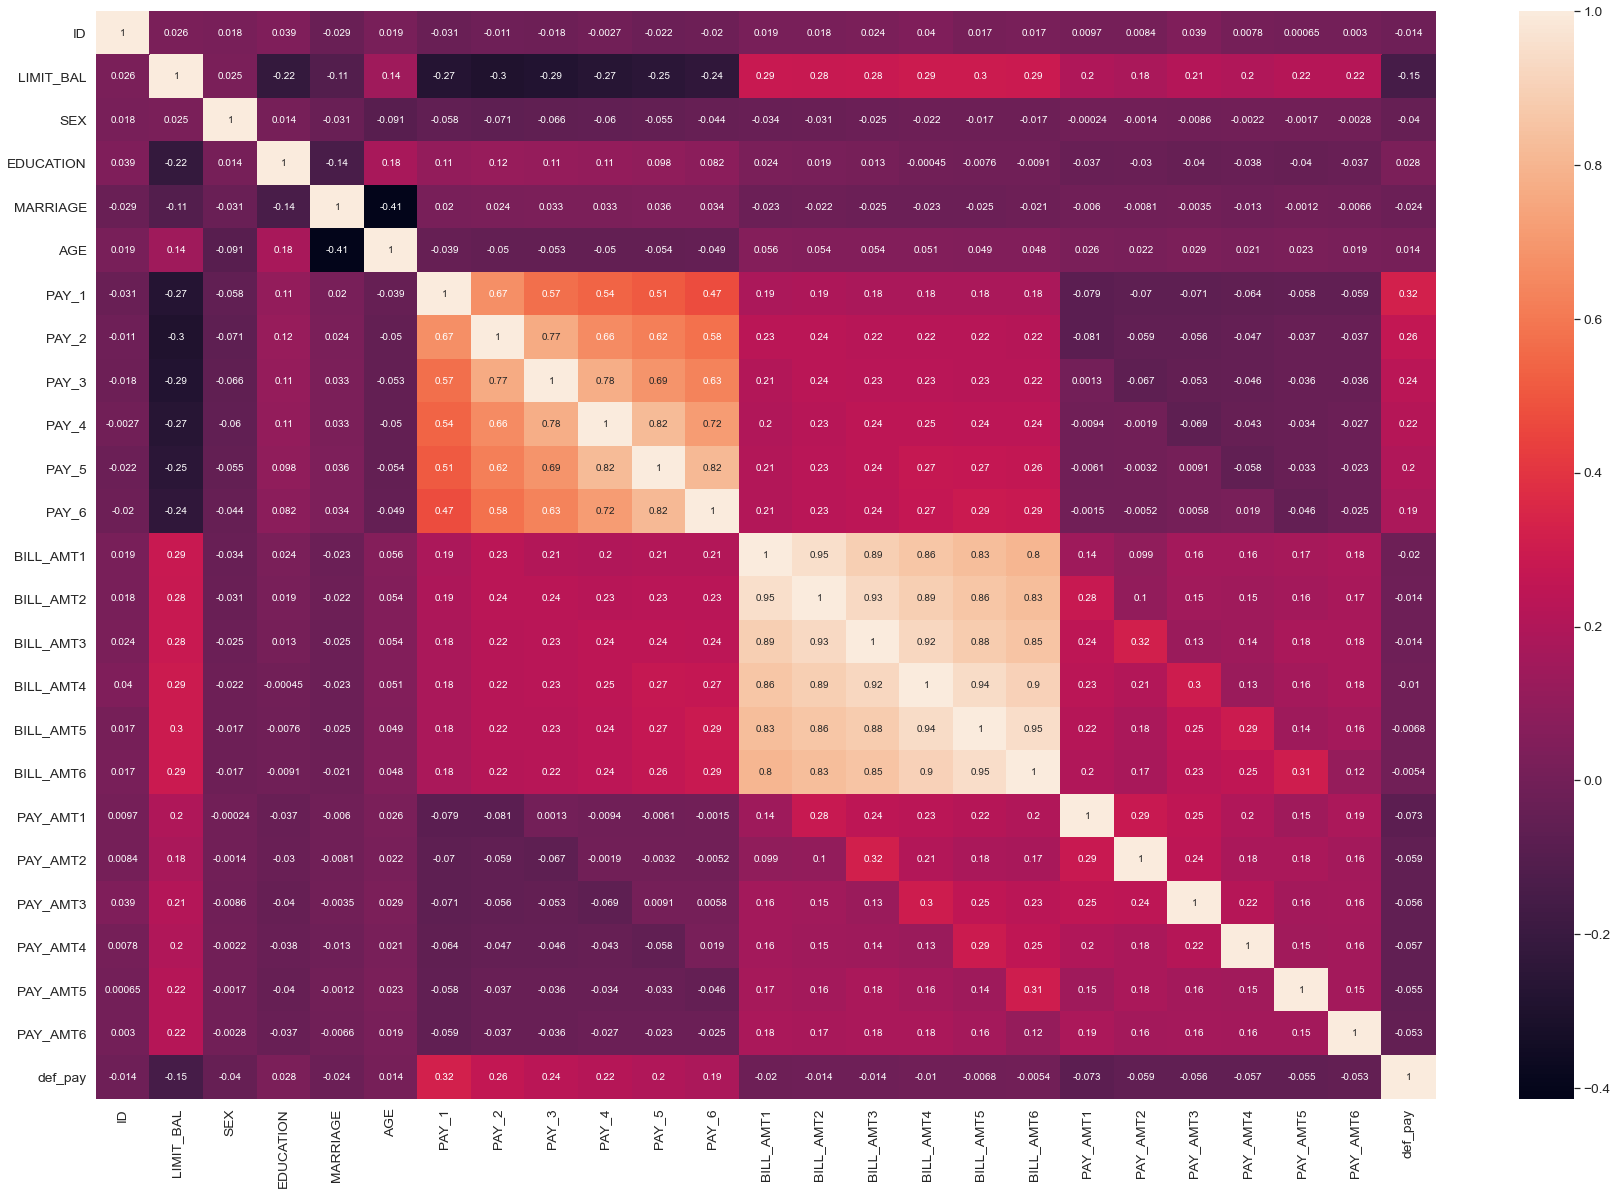

In [35]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()

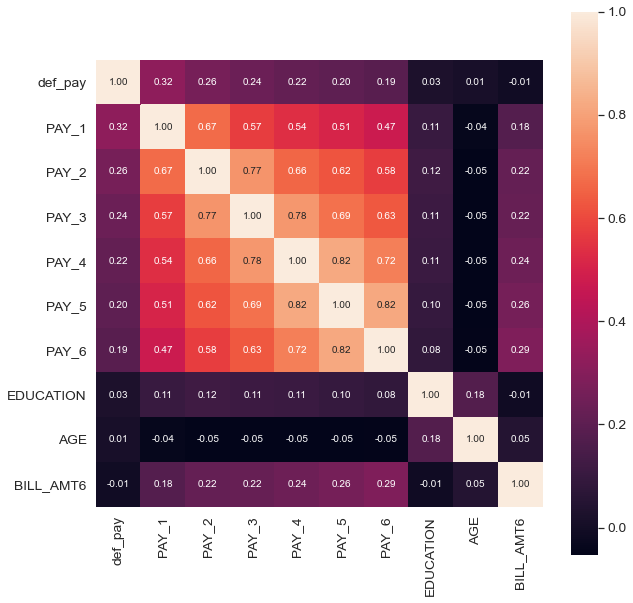

In [36]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = defaulters.corr()
cols = corrmat.nlargest(k, 'def_pay')['def_pay'].index
cm = np.corrcoef(defaulters[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

as we can see that next month default prediction is dependent on repayment status of past six months of all the features given to us. But there is multicollinearity between the Repayment Status features. We will first train model with all the features and try reducing the non-important features.

# SMOTE

Balancing the class imbalance

In [37]:
x = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
y = defaulters.def_pay

import imblearn.over_sampling as ovs
oversample = ovs.SMOTE() 
x,y = oversample.fit_resample(x,y)

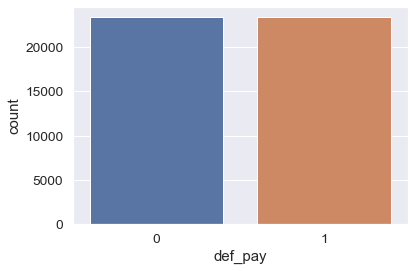

In [38]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.countplot(y)
plt.show()

# MODEL1

Logistic Regession with all the features

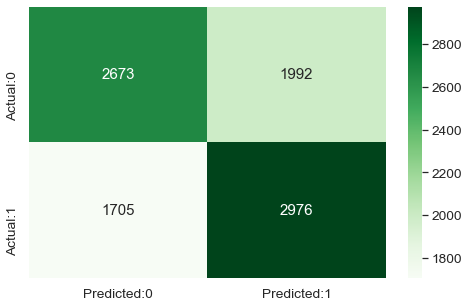

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      4378
           1       0.64      0.60      0.62      4968

    accuracy                           0.60      9346
   macro avg       0.60      0.60      0.60      9346
weighted avg       0.61      0.60      0.60      9346


Accuracy Score for model1:  0.6044297025465439

Train Accuracy Score for model1:  0.6174094483976246


In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
y_train_pred = model1.predict(X_train)

cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print(classification_report(y_pred, y_test))

print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model1: ', accuracy_score(y_train_pred,y_train))

# MODEL2

Logistic Regression model but now by dropping the multicollinearity variables and keeping only PAY_1 variable.

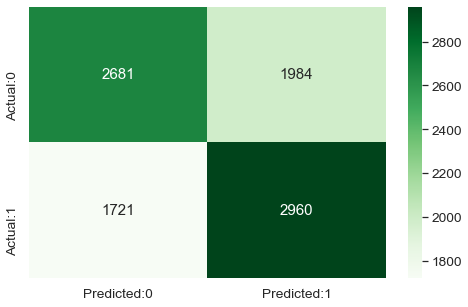

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      4402
           1       0.63      0.60      0.62      4944

    accuracy                           0.60      9346
   macro avg       0.60      0.60      0.60      9346
weighted avg       0.61      0.60      0.60      9346


Accuracy Score for model2:  0.6035737213781297

Train Accuracy Score for model2:  0.6172221924990637


In [40]:
df_X = x.drop(['PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'], axis=1)
df_y = y

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
y_train_pred = model2.predict(X_train)

cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print(classification_report(y_pred, y_test))

print('\nAccuracy Score for model2: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model2: ', accuracy_score(y_train_pred,y_train))

As we can see even now the accuracy does not change.

# MODEL3

using ridge regression since it works well with multicollinear data

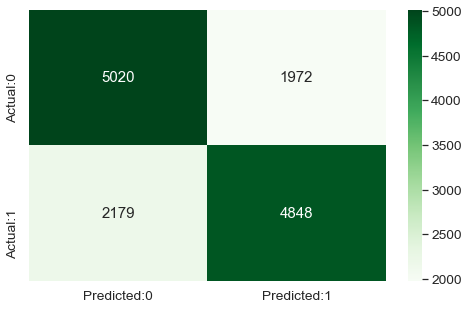

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      7199
           1       0.69      0.71      0.70      6820

    accuracy                           0.70     14019
   macro avg       0.70      0.70      0.70     14019
weighted avg       0.70      0.70      0.70     14019


Test Accuracy Score for model3:  0.7039018474926885

Train Accuracy Score for model3:  0.7116695710660674


In [41]:
df_X = x[['SEX','MARRIAGE','AGE','BILL_AMT1','EDUCATION','PAY_1']]
df_y = y

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=20)

model3 = RidgeClassifier()
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)
y_train_pred = model3.predict(X_train)

cm = confusion_matrix(y_test, y_pred) 
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (8, 5)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens") 
plt.show() 
print(classification_report(y_pred, y_test))

print('\nTest Accuracy Score for model3: ', accuracy_score(y_pred,y_test))
print('\nTrain Accuracy Score for model3: ', accuracy_score(y_train_pred,y_train))

the accuracy has marginally increased by 10% 

In [42]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cross_val_score(RidgeClassifier(),df_X,df_y)

array([0.62390327, 0.68296597, 0.72737   , 0.7658641 , 0.72434457])

This indicates however  ridge classifier works well on this data than logistic regression there is variance(variability in the prediction of the model) 